In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
x=df.drop(columns=["Strength"]) ## input
y=df.iloc[:,-1]   ## output

X_train,X_test, Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
## Apply Liner Regression without using transformation
lr=LinearRegression()
lr.fit(X_train,Y_train)
y_preds=lr.predict(X_test)

r2_score(Y_test,y_preds)

0.6275531792314848

In [10]:
## cross check 
lr=LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring="r2"))

np.float64(0.4609940491662864)

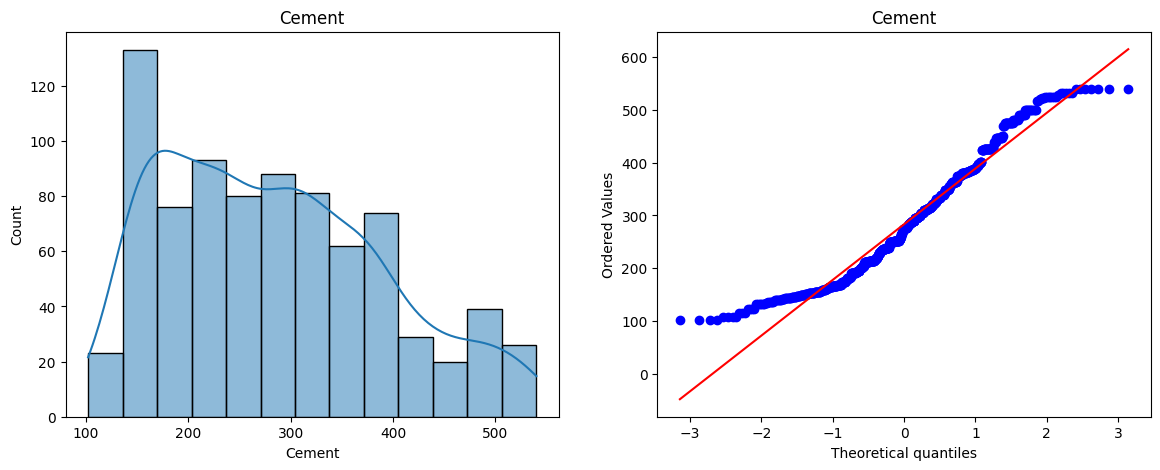

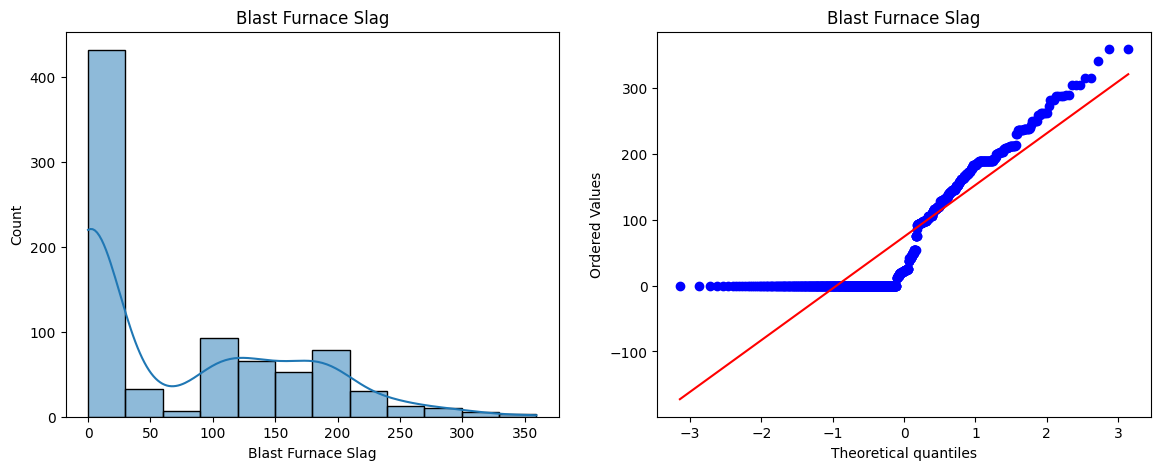

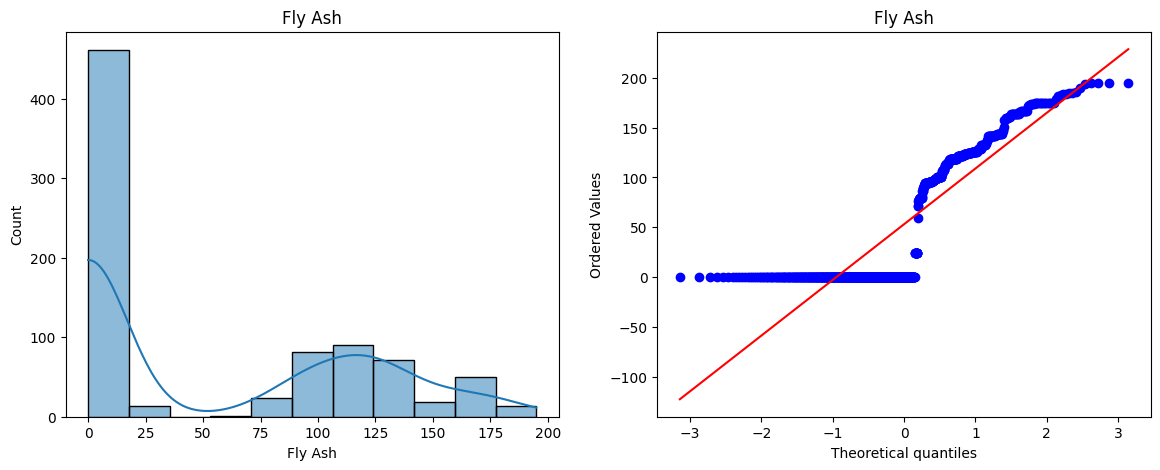

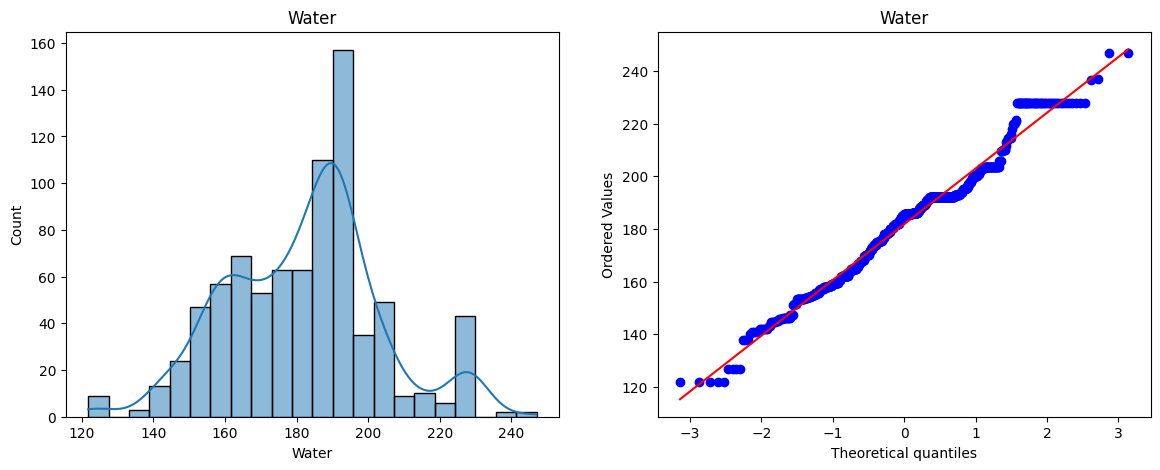

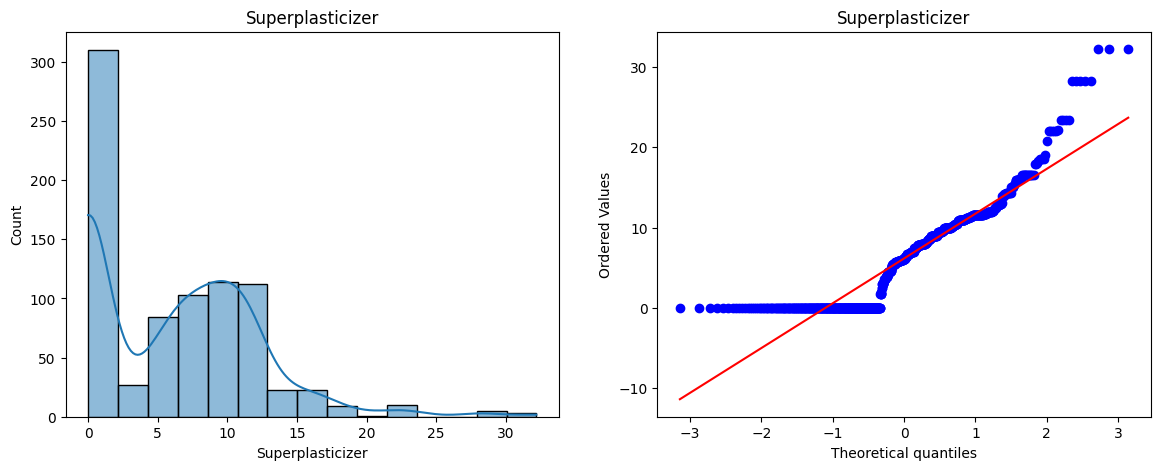

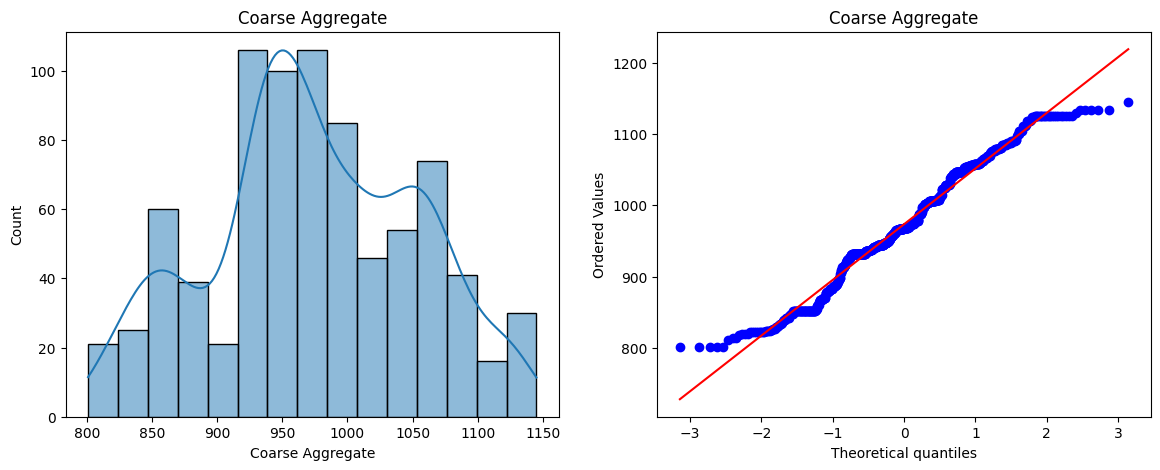

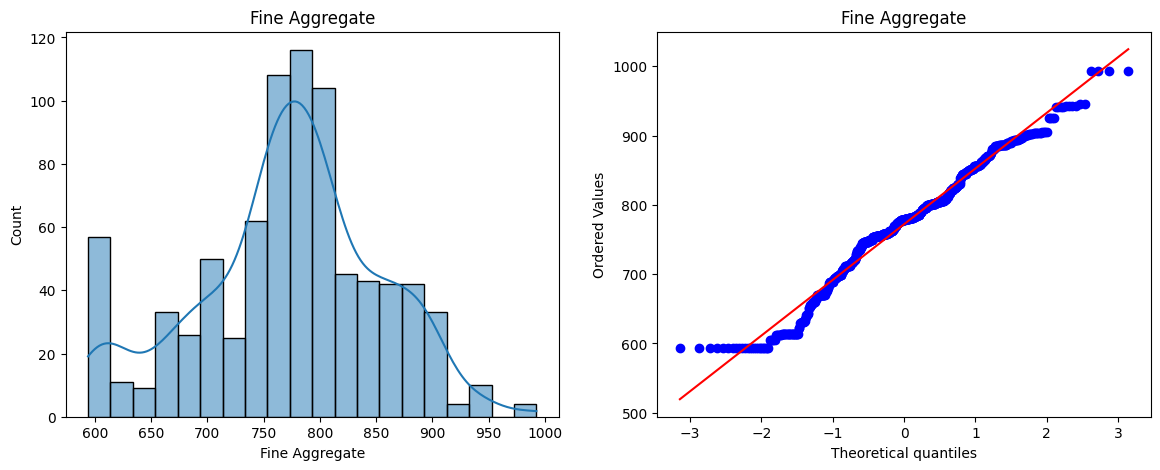

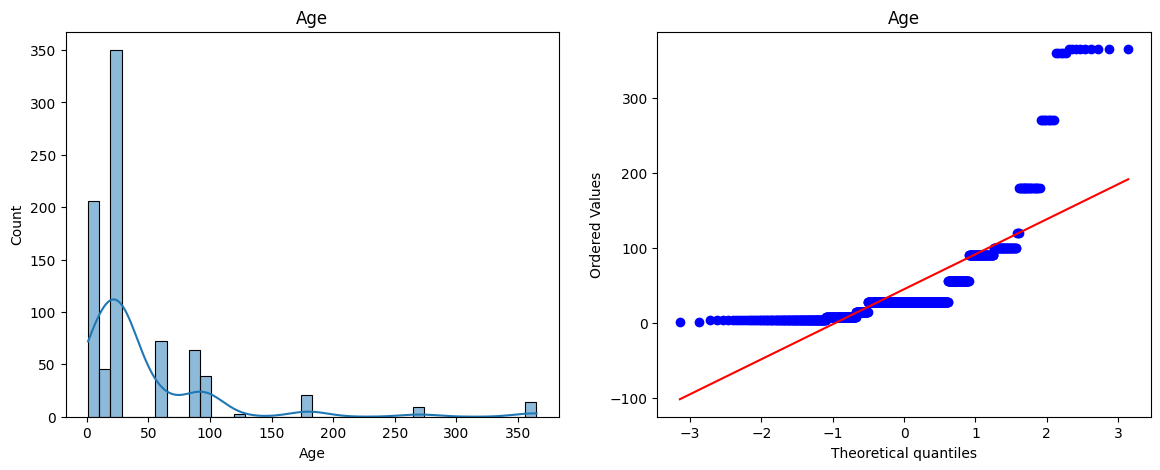

In [12]:
### ploating the 

for col in X_train.columns:
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True) ## sns.histplot: Seaborn function for plotting histograms.
    plt.title(col)

    plt.subplot(1,2,2)
    stats.probplot(X_train[col],dist="norm",plot=plt) ## stats.probplot: From scipy.stats, it makes a QQ plot (Quantile-Quantile plot).
    plt.title(col)

    plt.show()

In [13]:
pt=PowerTransformer(method="box-cox")

X_train_transformed=pt.fit_transform(X_train+0.00000000000001)
x_test_transformed=pt.fit_transform(X_test+0.000000000000001)

pd.DataFrame({"cols":X_train.columns,"box_cox_lambda":pt.lambdas_})

,cols,box_cox_lambda
0,Cement,0.215602
1,Blast Furnace Slag,0.013154
2,Fly Ash,-0.002995
3,Water,0.959062
4,Superplasticizer,0.046214
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [14]:
lr=LinearRegression()
lr.fit(X_train_transformed,Y_train)

y_preds2=lr.predict(x_test_transformed)
r2_score(Y_test,y_preds2)

0.8033510955760912

In [15]:
pt=PowerTransformer(method="box-cox")
x_transformed=pt.fit_transform(x+0.000000000000001)

## cross check 
lr=LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring="r2"))

np.float64(0.6640637455979121)

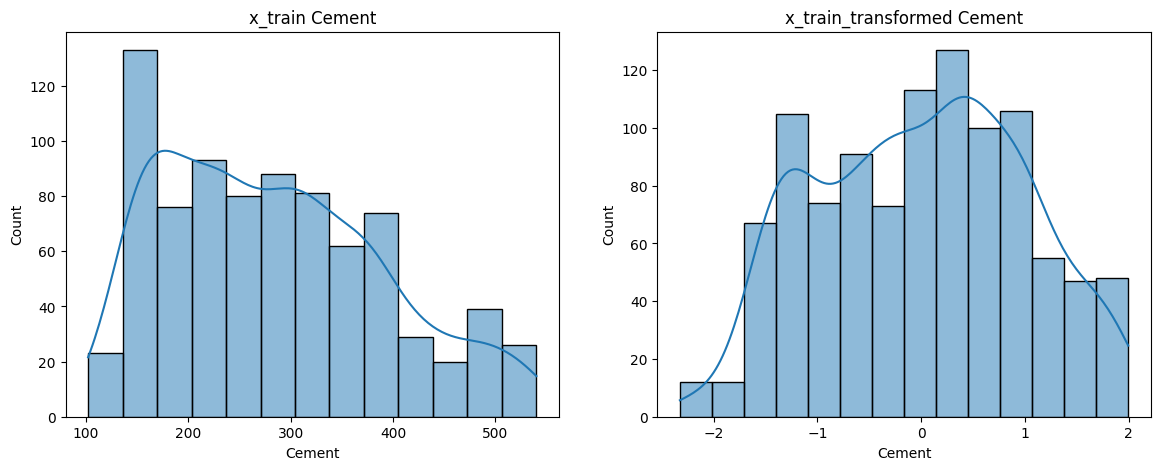

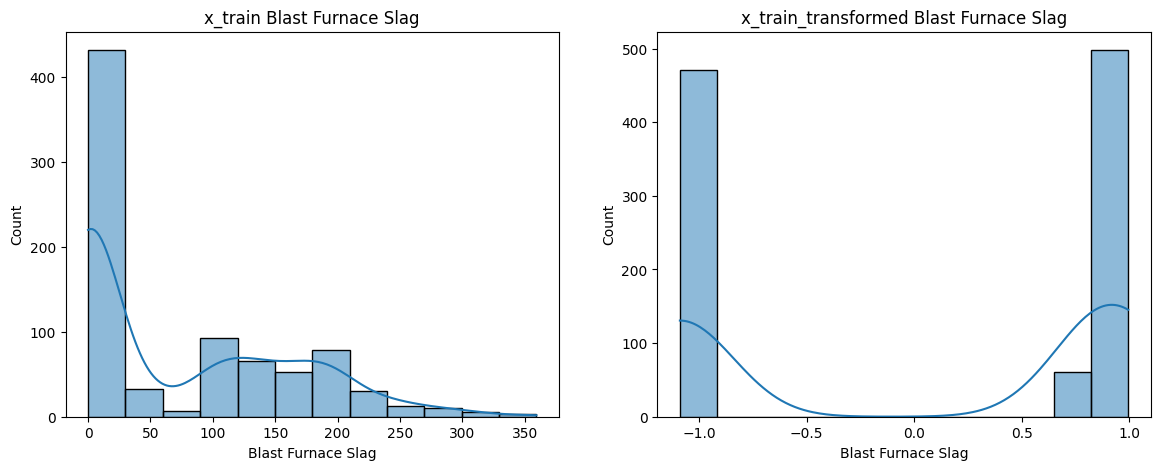

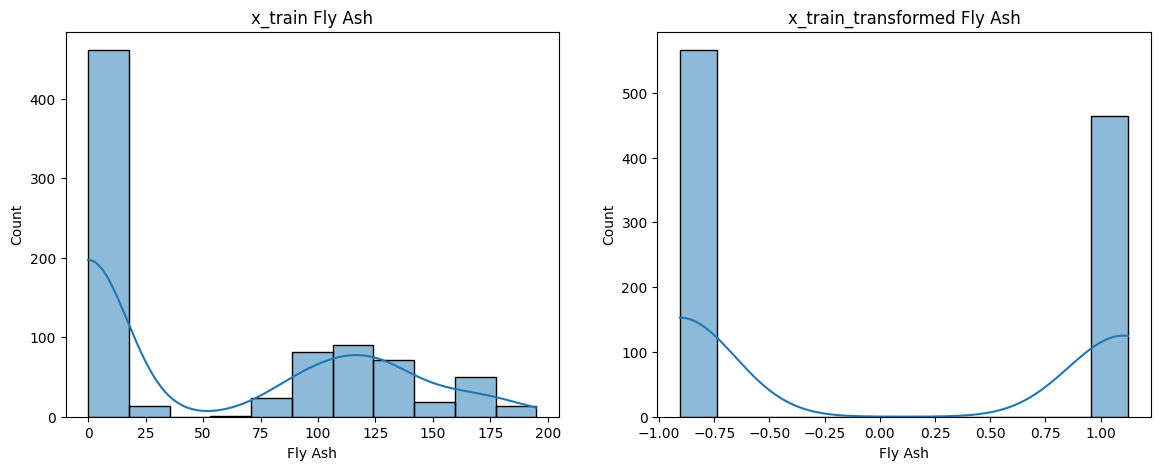

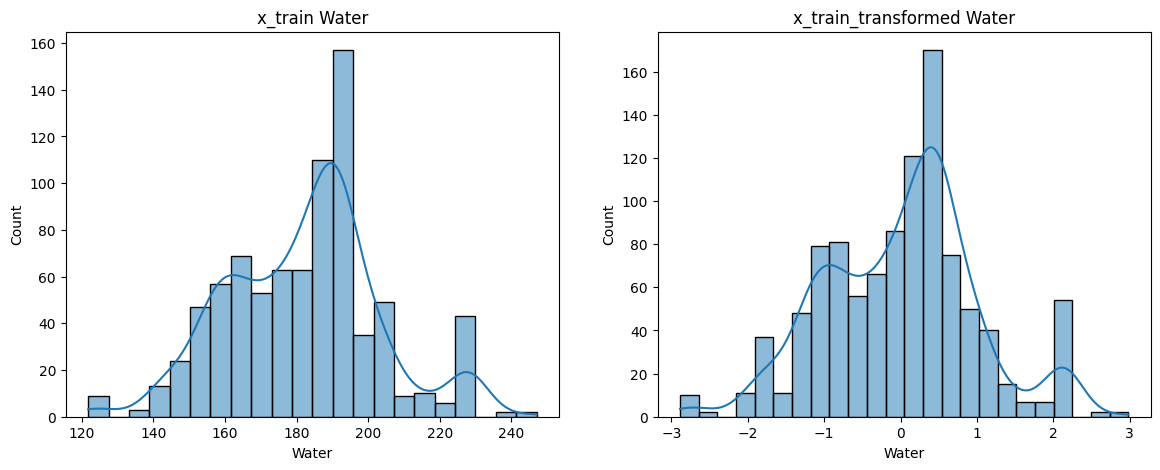

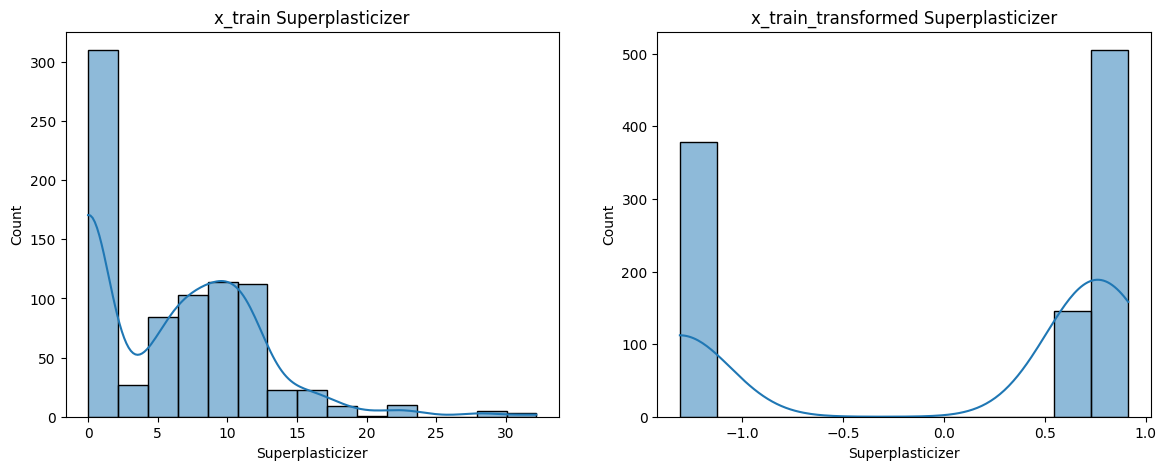

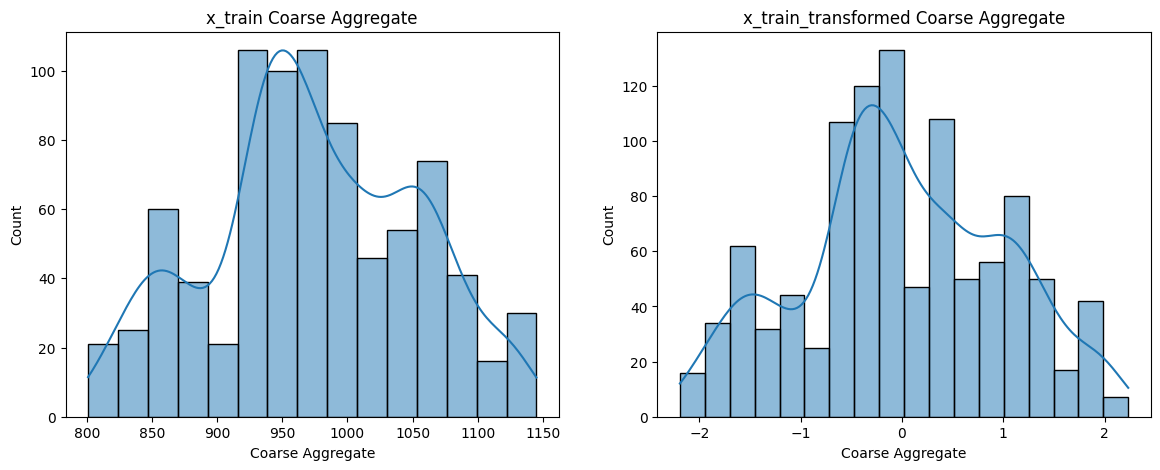

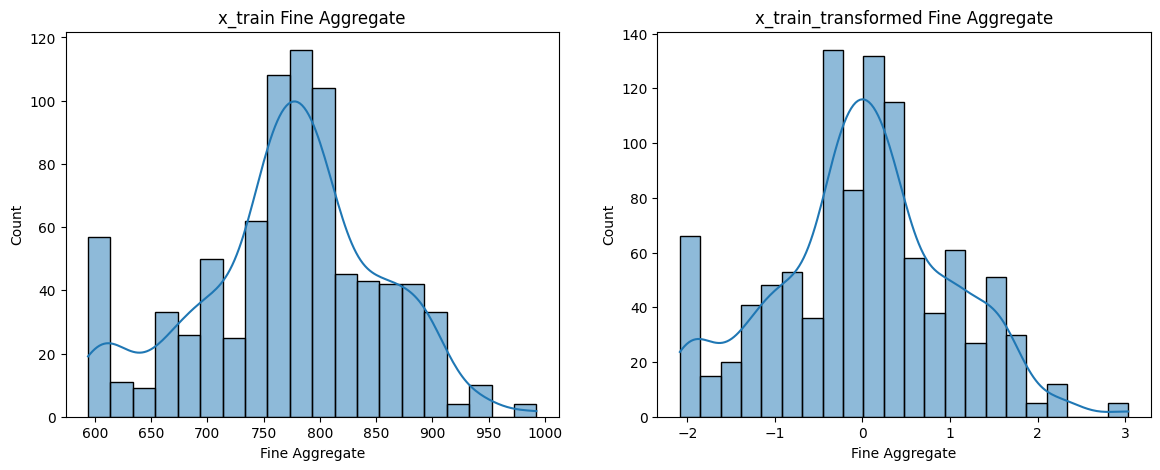

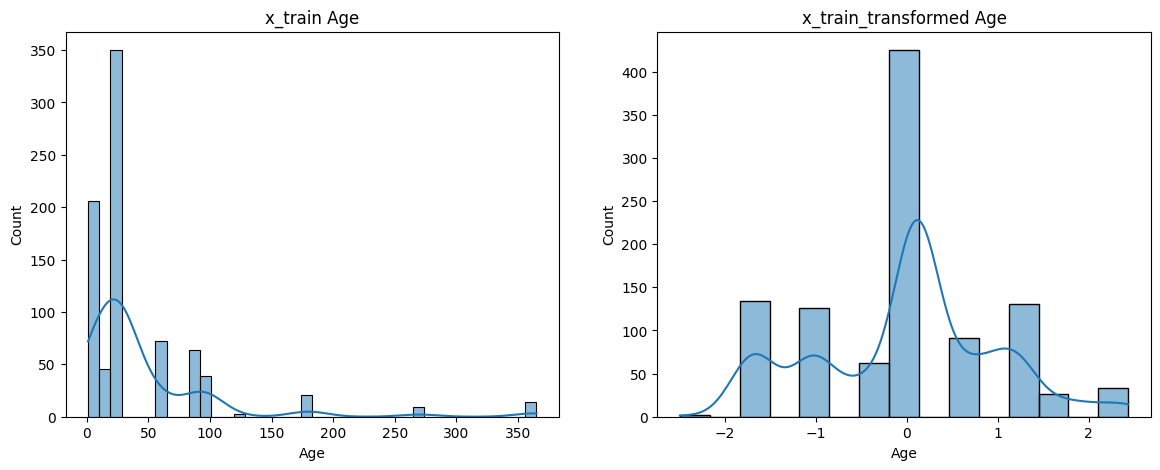

In [22]:
## Before transformation and after transformation

X_train_transformed = pd.DataFrame(x_transformed, columns=x.columns)
for col in X_train.columns:
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True) ## sns.histplot: Seaborn function for plotting histograms.
    plt.title(f"x_train {col}")

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed[col], kde=True) ## sns.histplot: Seaborn function for plotting histograms.
    plt.title(f"x_train_transformed {col}")

    plt.show()

In [29]:
pt=PowerTransformer() ## default yeo -johnson

X_train_transformed2=pt.fit_transform(X_train)
x_test_transformed2=pt.fit_transform(X_test)

pd.DataFrame({"cols":X_train.columns,"box_cox_lambda":pt.lambdas_})

lr=LinearRegression()
lr.fit(X_train_transformed2,Y_train)

y_preds3=lr.predict(x_test_transformed2)
print(r2_score(Y_test,y_preds3))

pd.DataFrame({"cols":X_train.columns,"yeo_jhonson_lambda":pt.lambdas_})

0.8153845514645103


,cols,yeo_jhonson_lambda
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [24]:
pt=PowerTransformer()
x_transformed2=pt.fit_transform(x)

## cross check 
lr=LinearRegression()
np.mean(cross_val_score(lr,x_transformed2,y,scoring="r2"))

np.float64(0.6834625126992433)

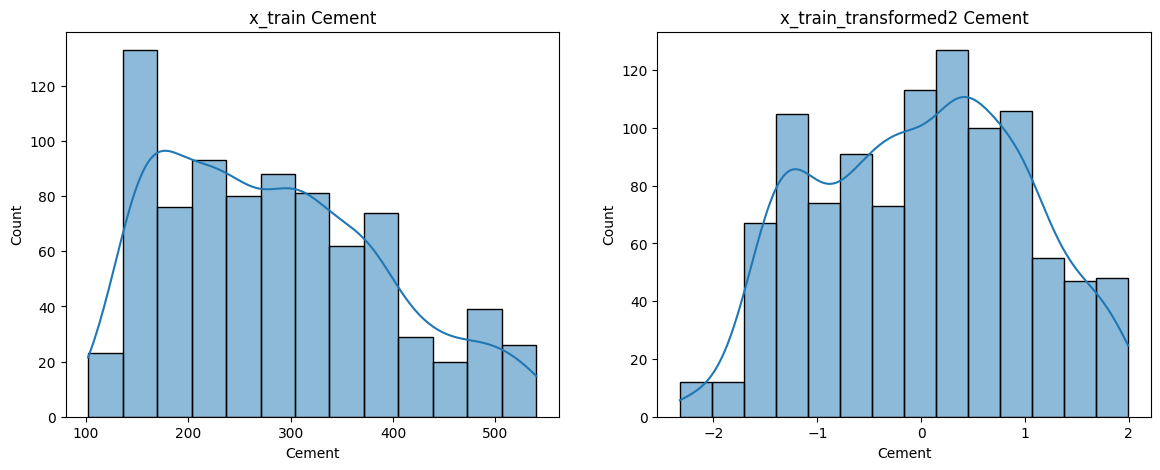

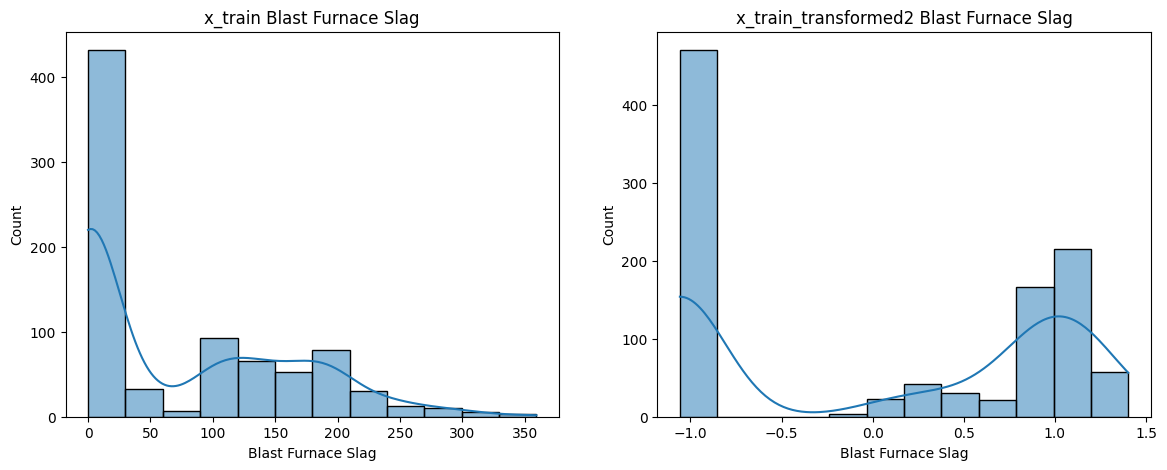

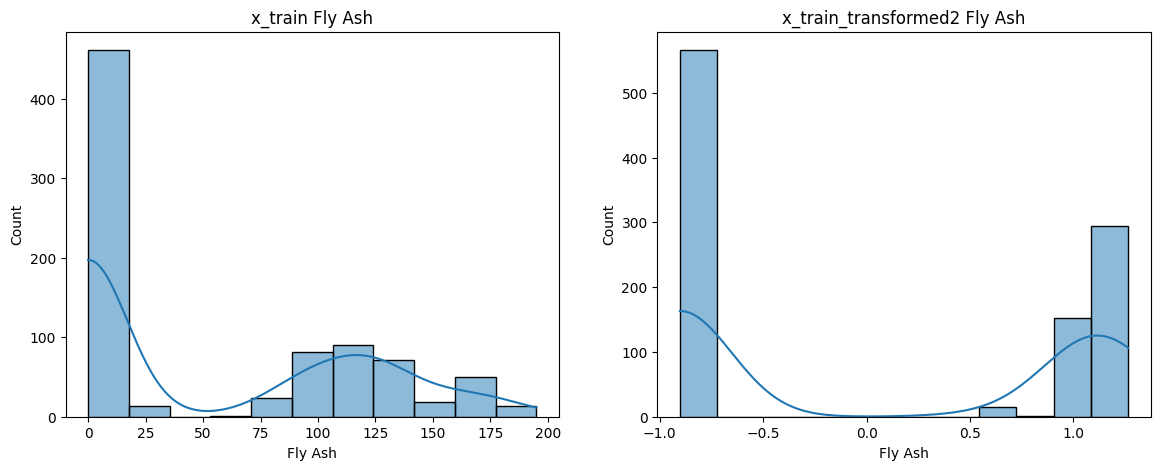

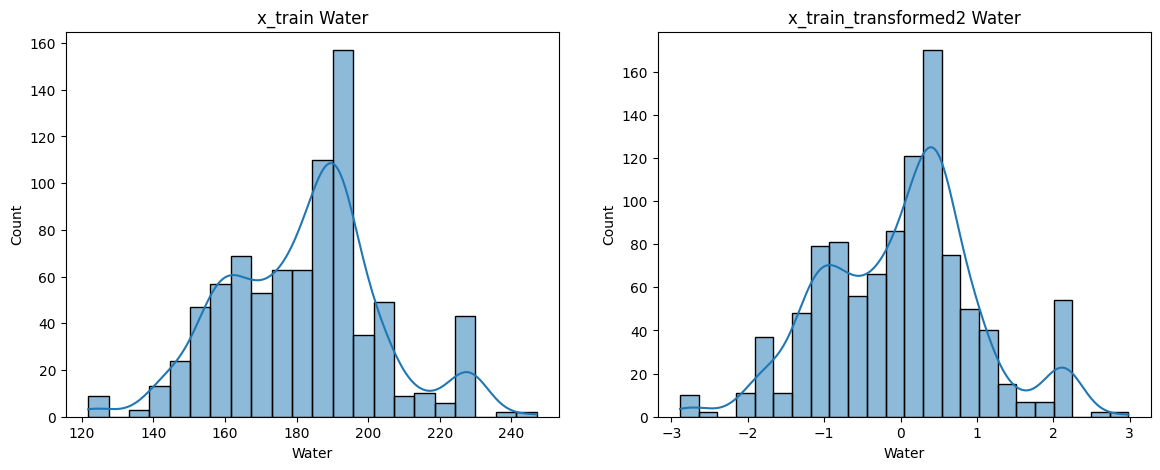

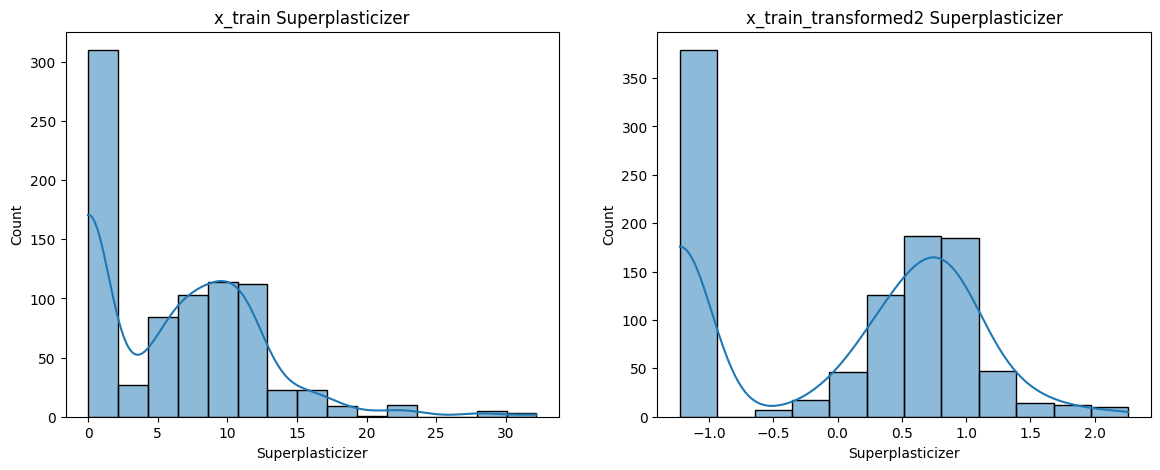

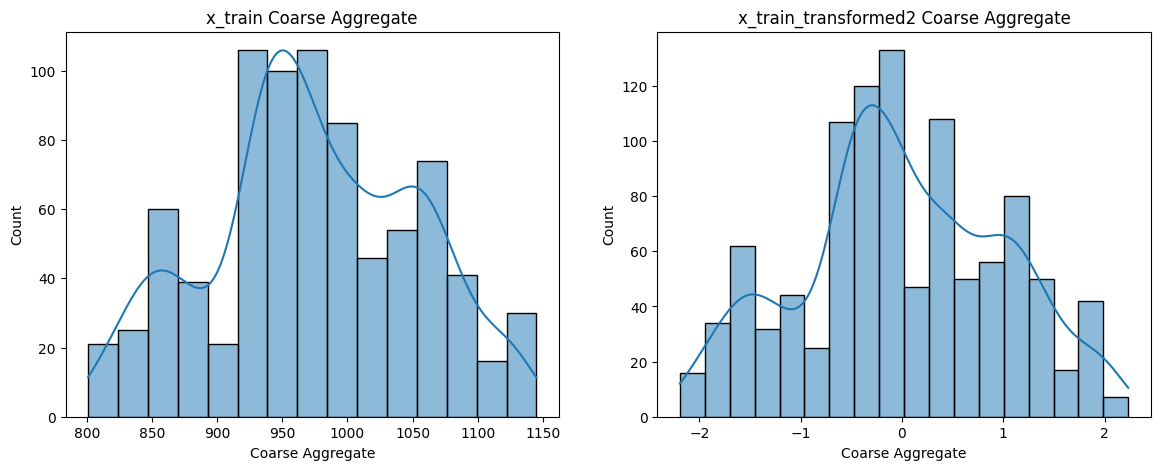

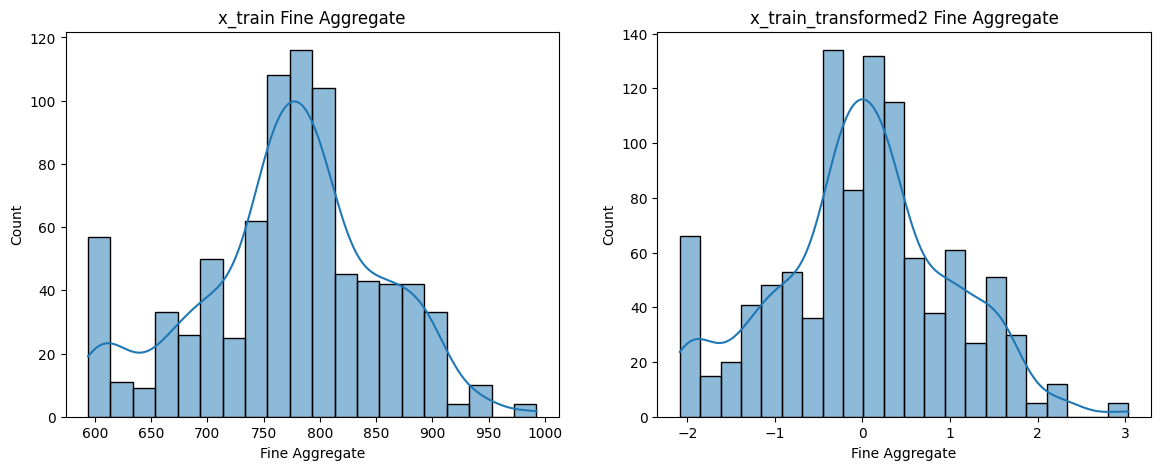

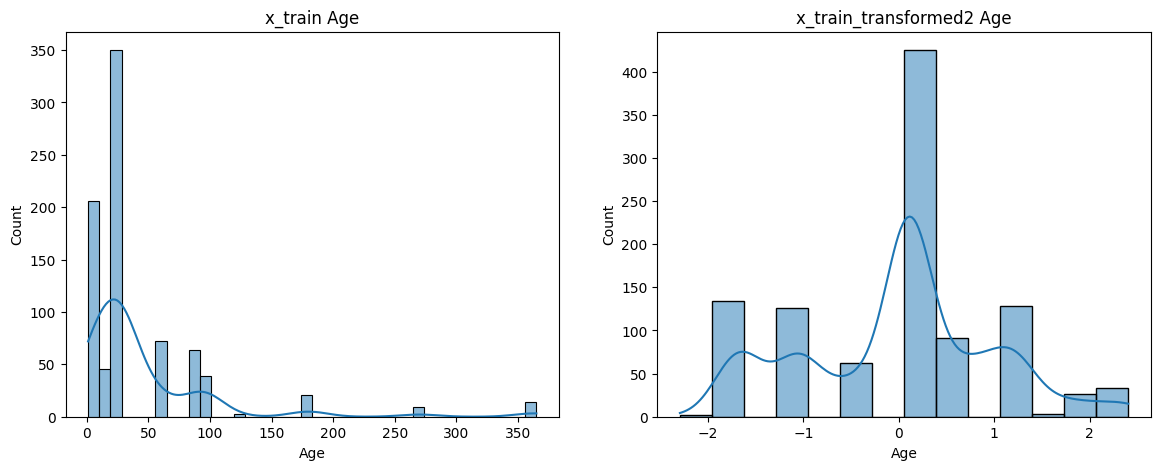

In [25]:
## Before transformation and after transformation

X_train_transformed2 = pd.DataFrame(x_transformed2, columns=x.columns)
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True) ## sns.histplot: Seaborn function for plotting histograms.
    plt.title(f"x_train {col}")

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed2[col], kde=True) ## sns.histplot: Seaborn function for plotting histograms.
    plt.title(f"x_train_transformed2 {col}")

    plt.show()